In [45]:
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Jupyter notebooks
%matplotlib inline
sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

# 2. FILE PATHS – CHANGE THESE TO YOUR LOCATIONS
survey_path     = r"C:\local disk E\realme files\siri project\Hair project\Hair Loss Survey Dataset (Responses) - Form Responses 1.csv"
luke_path       = r"C:\local disk E\realme files\siri project\Hair project\Luke_hair_loss_documentation.csv"
hair3592_path   = r"C:\local disk E\realme files\siri project\Hair project\hairfall_problem3592.xlsx - hairfall_problem3592.csv"
cosmetic_path   = r"C:\local disk E\realme files\siri project\Hair project\cosmetic_p.csv"
skincare_path   = r"C:\local disk E\realme files\siri project\Hair project\skincare.csv"
sephora_path    = r"C:\local disk E\realme files\siri project\Hair project\sephora_website_dataset.csv"


In [47]:
# 3. LOAD DATASETS

survey = pd.read_excel(survey_path)
luke = pd.read_csv(luke_path)
hair3592 = pd.read_csv(hair3592_path)
cosmetic = pd.read_csv(cosmetic_path)
skincare = pd.read_csv(skincare_path)
sephora = pd.read_csv(sephora_path)

print("Survey:", survey.shape)
print("Luke:", luke.shape)
print("Hairfall 3592:", hair3592.shape)
print("Cosmetic:", cosmetic.shape)
print("Skincare:", skincare.shape)
print("Sephora:", sephora.shape)


ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [ ]:
# 4. QUICK GLANCE AT COLUMNS

print("\n=== Survey Columns ===")
print(survey.columns)

print("\n=== Luke Hair Loss Columns ===")
print(luke.columns)

print("\n=== Hairfall 3592 Columns ===")
print(hair3592.columns)

print("\n=== Cosmetic Ingredients Columns ===")
print(cosmetic.columns)

print("\n=== Skincare Columns ===")
print(skincare.columns)

print("\n=== Sephora Website Columns ===")
print(sephora.columns)


In [50]:
# 5. CLEAN SURVEY COLUMN NAMES
survey_raw = survey.copy()

survey.columns = (
    survey.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[()\-\/]", "", regex=True)
)

survey.head()


,timestamp,age,gender,country_of_origin,state_in_usa,years_in_usa,water_type,water_type_changed_after_coming_to_usa,diet_change,daily_water_intake_liters,stress_level,sleep_hours,hair_type,scalp_type,wash_freq,do_you_oil_your_hair?,heat_tools_usage,hair_color__bleach,hijab_or_turban_use,use_of_hair_styling_products,iron_deficiency,vitamin_d_deficiency,thyroid_issues,recent_major_illness,hair_loss_severity,hair_loss_increased_after_coming_to_usa,hair_loss_pattern,when_did_hair_loss_start?,antidandruff_shampoo_use,top_3_hair_products_you_use,budget_for_hair_products,consent_to_use_data_for_academic_research
0,2025-11-14 11:15:02.890,23,Male,India,Connecticut,2-3 years,Soft,Yes,Less protein,1-2L,5.0,NaN,Wavy,Mixed,3,Yes,Never,No,No,No,no,no,no,no,5.0,yes,Hair fall at roots,6 months,yes,Na,medium,yes
1,2025-11-14 11:15:06.818,25,Female,India,Connecticut,1-2 years,Hard,Yes,More protein,1-2L,7.0,NaN,Wavy,Mixed,2,Yes,Weekly,No,No,Yes,not sure,yes,no,no,10.0,yes,Receding Hairline,First Month,no,"Oil, shampoo, serum",medium,yes
2,2025-11-14 11:17:42.117,21,Female,India,Connecticut,1-2 years,Soft,Yes,Less protein,Less than 1L,8.0,NaN,Straight,Oily,2,No,Rarely,No,No,No,yes,yes,no,no,10.0,yes,Hair fall at roots,First Month,yes,Tresemmé \nL'Oreal Paris Elvive Hyaluron Plump\n,medium,yes
3,2025-11-14 11:17:44.348,23,Male,India,Connecticut,1-2 years,Dont know,Yes,Same,More than 3L,8.0,NaN,Wavy,Dry,3,No,Never,No,No,No,no,no,no,no,6.0,yes,Receding Hairline,Gradual,yes,"Head and shoulder,nizoral",low,yes
4,2025-11-14 11:20:23.861,25,Male,India,Texas,2-3 years,Hard,Yes,More protein,2-3L,6.0,NaN,Straight,Dry,3,Yes,Never,No,No,No,no,no,no,no,7.0,yes,Overall Thinning,3 months,no,Na,medium,yes


In [52]:
# 6. MISSING VALUES
survey.isnull().sum()


timestamp                                     0
age                                           0
gender                                        0
country_of_origin                             0
state_in_usa                                  0
years_in_usa                                  0
water_type                                    0
water_type_changed_after_coming_to_usa        0
diet_change                                   0
daily_water_intake_liters                     0
stress_level                                  2
sleep_hours                                  59
hair_type                                     0
scalp_type                                    0
wash_freq                                     0
do_you_oil_your_hair?                         0
heat_tools_usage                              0
hair_color__bleach                            0
hijab_or_turban_use                           0
use_of_hair_styling_products                  0
iron_deficiency                         

In [13]:
# 7. BASIC STATS (numeric + categorical)
survey.describe(include="all").T


,count,unique,top,freq,mean,min,25%,50%,75%,max
timestamp,59,NaN,NaN,NaN,2025-11-14 13:26:13.041576704,2025-11-14 11:15:02.890000,2025-11-14 11:40:03.493999872,2025-11-14 13:16:15.904999936,2025-11-14 14:11:33.266500096,2025-11-14 18:28:10.412000
age,59.0,15.0,23.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN
gender,59,3,Female,34,NaN,NaN,NaN,NaN,NaN,NaN
country_of_origin,59,5,India,53,NaN,NaN,NaN,NaN,NaN,NaN
state_in_usa,59,28,Connecticut,20,NaN,NaN,NaN,NaN,NaN,NaN
years_in_usa,59,5,1-2 years,25,NaN,NaN,NaN,NaN,NaN,NaN
water_type_at_home,59,3,Dont know,26,NaN,NaN,NaN,NaN,NaN,NaN
water_type_changed_after_coming_to_usa,59,3,Yes,46,NaN,NaN,NaN,NaN,NaN,NaN
diet_change_after_moving,59,3,Less protein,27,NaN,NaN,NaN,NaN,NaN,NaN
daily_water_intake_liters,59,4,2-3L,30,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# 8. RENAME IMPORTANT COLUMNS –  UPDATE THIS MAPPING AFTER YOU SEE YOUR COLUMNS

rename_map = {
    # "original_column_name_in_file": "new_clean_name",
    # Examples – change to match your dataset:
    "age": "age",
    "stress_level": "stress_level",
    "sleep_hours": "sleep_hours",
    "hair_loss_severity": "hair_loss_severity",
    "water_type_at_home": "water_type",
    "diet_change_after_moving": "diet_change",
    "hair_type": "hair_type",
    "scalp_type": "scalp_type",
    "wash_frequency_per_week": "wash_freq",
}

survey = survey.rename(columns=rename_map)
survey.head()


,timestamp,age,gender,country_of_origin,state_in_usa,years_in_usa,water_type,water_type_changed_after_coming_to_usa,diet_change,daily_water_intake_liters,stress_level,sleep_hours,hair_type,scalp_type,wash_freq,do_you_oil_your_hair?,heat_tools_usage,hair_color__bleach,hijab_or_turban_use,use_of_hair_styling_products,iron_deficiency,vitamin_d_deficiency,thyroid_issues,recent_major_illness,hair_loss_severity,hair_loss_increased_after_coming_to_usa,hair_loss_pattern,when_did_hair_loss_start?,antidandruff_shampoo_use,top_3_hair_products_you_use,budget_for_hair_products,consent_to_use_data_for_academic_research
0,2025-11-14 11:15:02.890,23,Male,India,Connecticut,2-3 years,Soft,Yes,Less protein,1-2L,5.0,NaN,Wavy,Mixed,3,Yes,Never,No,No,No,no,no,no,no,5.0,yes,Hair fall at roots,6 months,yes,Na,medium,yes
1,2025-11-14 11:15:06.818,25,Female,India,Connecticut,1-2 years,Hard,Yes,More protein,1-2L,7.0,NaN,Wavy,Mixed,2,Yes,Weekly,No,No,Yes,not sure,yes,no,no,10.0,yes,Receding Hairline,First Month,no,"Oil, shampoo, serum",medium,yes
2,2025-11-14 11:17:42.117,21,Female,India,Connecticut,1-2 years,Soft,Yes,Less protein,Less than 1L,8.0,NaN,Straight,Oily,2,No,Rarely,No,No,No,yes,yes,no,no,10.0,yes,Hair fall at roots,First Month,yes,Tresemmé \nL'Oreal Paris Elvive Hyaluron Plump\n,medium,yes
3,2025-11-14 11:17:44.348,23,Male,India,Connecticut,1-2 years,Dont know,Yes,Same,More than 3L,8.0,NaN,Wavy,Dry,3,No,Never,No,No,No,no,no,no,no,6.0,yes,Receding Hairline,Gradual,yes,"Head and shoulder,nizoral",low,yes
4,2025-11-14 11:20:23.861,25,Male,India,Texas,2-3 years,Hard,Yes,More protein,2-3L,6.0,NaN,Straight,Dry,3,Yes,Never,No,No,No,no,no,no,no,7.0,yes,Overall Thinning,3 months,no,Na,medium,yes


In [56]:
# After loading survey and cleaning column names:
print(survey.columns.tolist())

# Rename key columns to simpler names
rename_map = {
    "stress_level_010": "stress_level",
    "hair_loss_severity_0–10": "hair_loss_severity",
    "scale_type": "scalp_type",  # looks like a typo in your column
}

survey = survey.rename(columns=rename_map)

print("Renamed columns:")
print(survey.columns.tolist())


['timestamp', 'age', 'gender', 'country_of_origin', 'state_in_usa', 'years_in_usa', 'water_type', 'water_type_changed_after_coming_to_usa', 'diet_change', 'daily_water_intake_liters', 'stress_level', 'sleep_hours', 'hair_type', 'scalp_type', 'wash_freq', 'do_you_oil_your_hair?', 'heat_tools_usage', 'hair_color__bleach', 'hijab_or_turban_use', 'use_of_hair_styling_products', 'iron_deficiency', 'vitamin_d_deficiency', 'thyroid_issues', 'recent_major_illness', 'hair_loss_severity', 'hair_loss_increased_after_coming_to_usa', 'hair_loss_pattern', 'when_did_hair_loss_start?', 'antidandruff_shampoo_use', 'top_3_hair_products_you_use', 'budget_for_hair_products', 'consent_to_use_data_for_academic_research']
Renamed columns:
['timestamp', 'age', 'gender', 'country_of_origin', 'state_in_usa', 'years_in_usa', 'water_type', 'water_type_changed_after_coming_to_usa', 'diet_change', 'daily_water_intake_liters', 'stress_level', 'sleep_hours', 'hair_type', 'scalp_type', 'wash_freq', 'do_you_oil_your_ha

#### Hair loss severity distribution

In [58]:
import numpy as np

# 1. First check what weird values you have
print("Unique stress_level values:", survey["stress_level"].unique())
print("Unique hair_loss_severity values:", survey["hair_loss_severity"].unique())
print("Unique sleep_hours values:", survey["sleep_hours"].unique())


Unique stress_level values: [  5.    7.    8.    6.    4.    0.  100.   10.    9.    nan   6.5]
Unique hair_loss_severity values: [ 5.  10.   6.   7.   4.   3.   0.   9.   8.   2.   7.5  nan]
Unique sleep_hours values: [nan]


In [60]:
# Replace letter O/o with 0 (likely user meant 0 on 0–10 scale)
survey["stress_level"] = survey["stress_level"].replace({"O": 0, "o": 0})

# Convert to numeric, forcing non-numeric to NaN if anything else is weird
numeric_cols_to_fix = ["stress_level", "hair_loss_severity", "sleep_hours"]

for col in numeric_cols_to_fix:
    survey[col] = pd.to_numeric(survey[col], errors="coerce")

# Optional: drop rows where these are missing (for plotting / modeling)
survey_clean = survey.dropna(subset=numeric_cols_to_fix)

print("Shape before:", survey.shape)
print("Shape after cleaning:", survey_clean.shape)


Shape before: (59, 32)
Shape after cleaning: (0, 32)


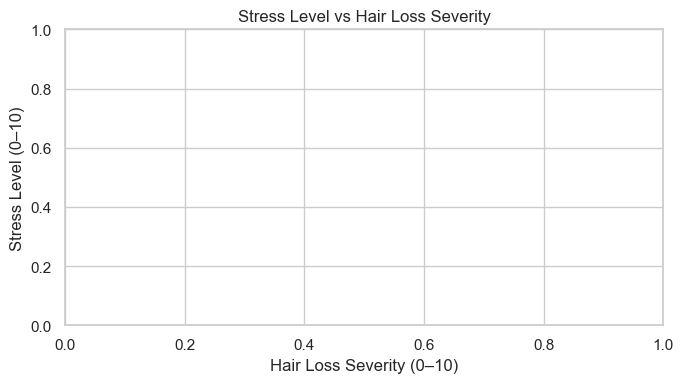

In [62]:
plt.figure(figsize=(7,4))
sns.boxplot(x=survey_clean["hair_loss_severity"], y=survey_clean["stress_level"])
plt.title("Stress Level vs Hair Loss Severity")
plt.xlabel("Hair Loss Severity (0–10)")
plt.ylabel("Stress Level (0–10)")
plt.tight_layout()
plt.show()


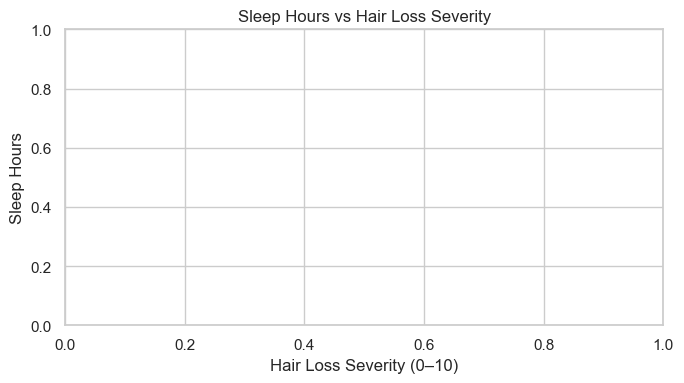

In [64]:
plt.figure(figsize=(7,4))
sns.boxplot(x=survey_clean["hair_loss_severity"], y=survey_clean["sleep_hours"])
plt.title("Sleep Hours vs Hair Loss Severity")
plt.xlabel("Hair Loss Severity (0–10)")
plt.ylabel("Sleep Hours")
plt.tight_layout()
plt.show()


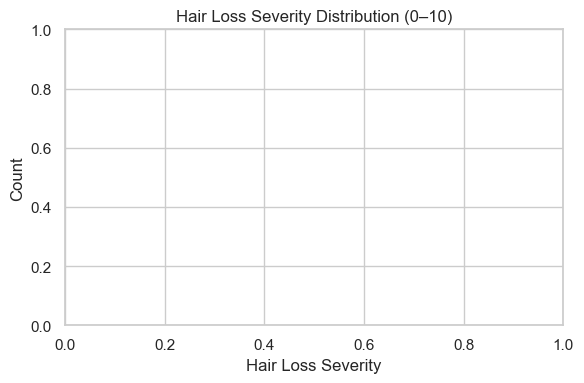

In [66]:
plt.figure(figsize=(6,4))
sns.countplot(x=survey_clean["hair_loss_severity"])
plt.title("Hair Loss Severity Distribution (0–10)")
plt.xlabel("Hair Loss Severity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


C:\Users\abina\AppData\Local\Temp\ipykernel_3964\1195393510.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Hair Loss Severity")


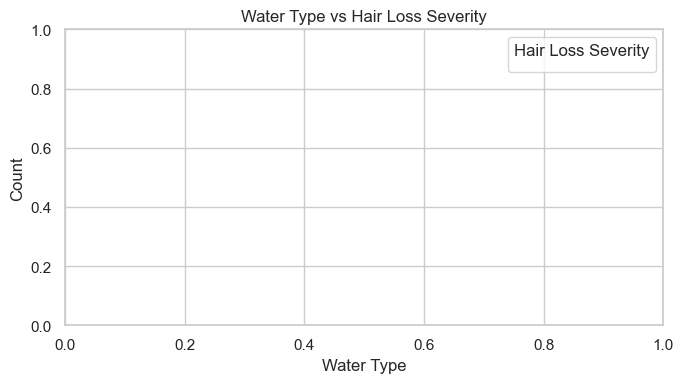

In [68]:
plt.figure(figsize=(7,4))
sns.countplot(data=survey_clean, x="water_type", hue="hair_loss_severity")
plt.title("Water Type vs Hair Loss Severity")
plt.xlabel("Water Type")
plt.ylabel("Count")
plt.legend(title="Hair Loss Severity")
plt.tight_layout()
plt.show()


In [72]:
survey_clean.to_csv("clean_survey_data.csv", index=False)
